## Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder,StandardScaler

## Importing the dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\LENOVO\Documents\Post Graduation\data sets\DSData-master\winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### This is a multi class prediction. however the question is about the wine quality. Therefore, I'm considering quality 1-7 as low and above 7 as high quality and encoding the same as per that

In [3]:
dataset['quality'] = np.where(dataset['quality']>=7,1,0)

## Looking at the count of class, I see that there is a major imbalance in the class. 

In [51]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [5]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### There are no null values in the data

In [6]:
relation = dataset.corr()
relation['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

### Correlation of indepedent variables with dependent variables are average, alcohol has the highest positive correlation and residual sugar has very less correlation which is close to 0

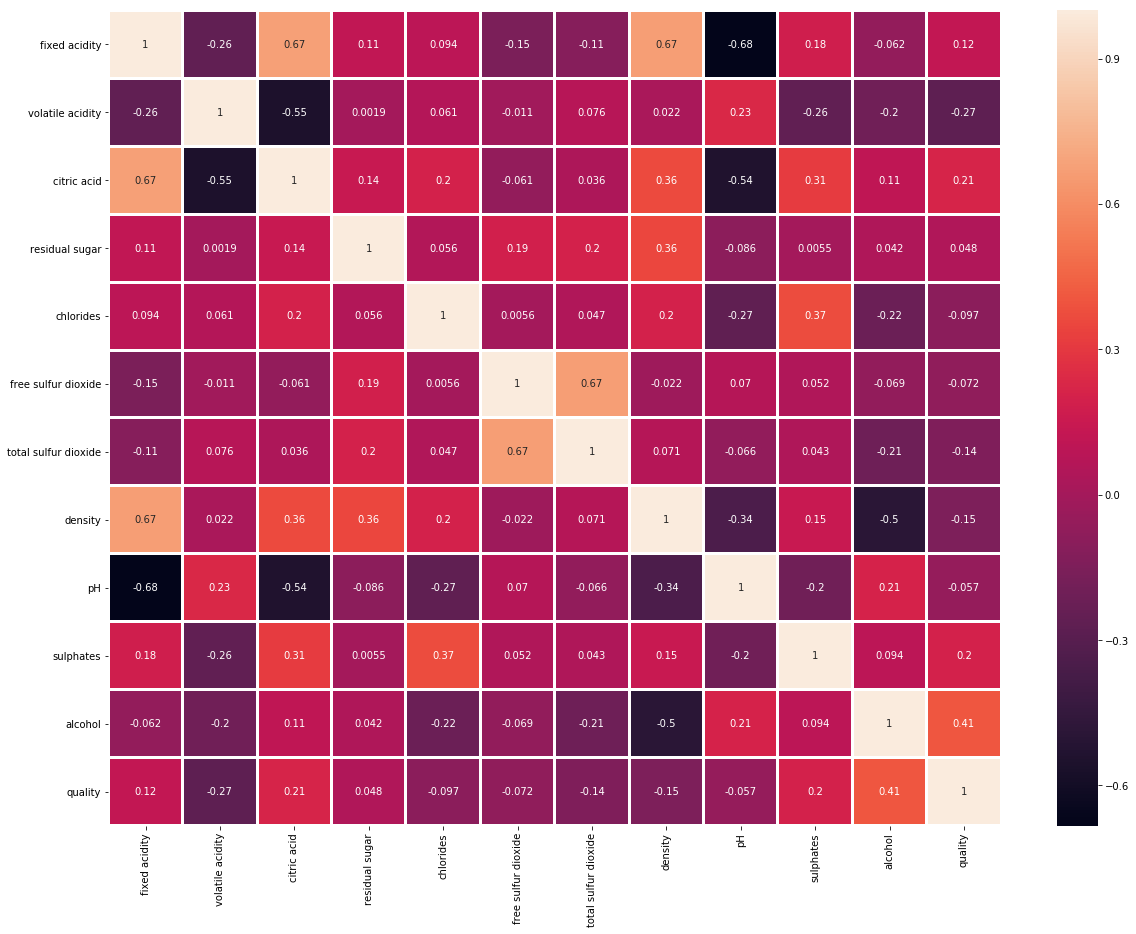

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(relation, annot = True,linewidths=2)
plt.show()

### There is no multi collenarity issue with the data, as we can see that only density has a correlation of 0.67 with fixed acidity and it is under control

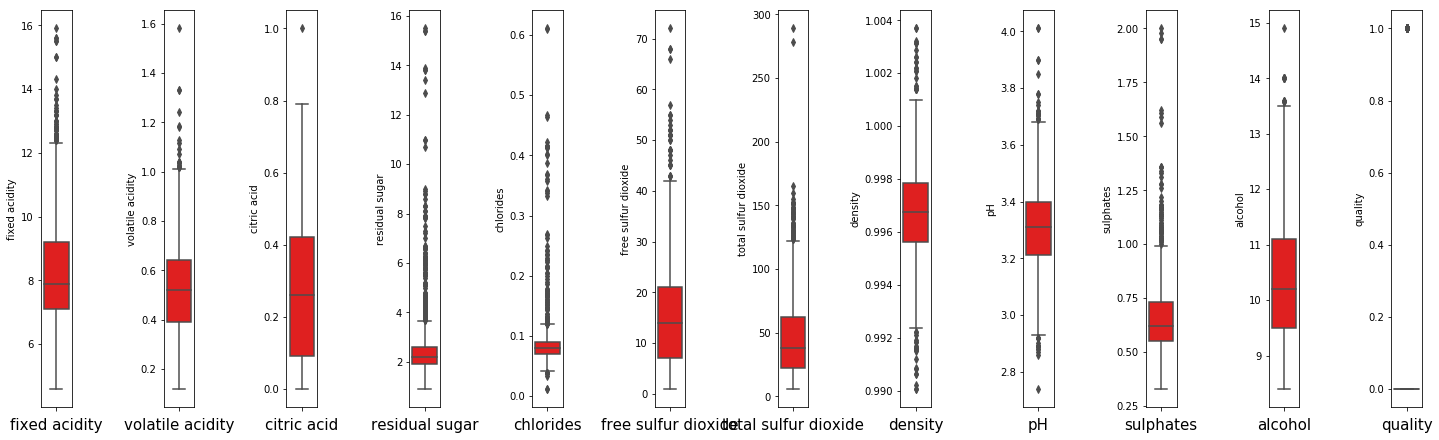

In [8]:
plt.figure(figsize = (20,60))
pltnum =1
for i in dataset:
    if pltnum <= 120:
        sc =plt.subplot(10,12,pltnum)
        sns.boxplot(dataset[i],color = 'red',orient = 'v')
        plt.xlabel(i,fontsize =15)
    pltnum+=1
plt.tight_layout()

### Upon reviewing the outlier using box-plot, I see that all the variabes has outliers. I can see highest outlier with the chlorides and residual sugar column. Further their correlation with the target variabe is very low(close to 0)

#### There is a low correlation between residual sugar, chlorides and quality. Further there is a lot of outliers for the same columns and I have evidence to drop the same.

In [9]:
dataset1 =  dataset.drop(columns = ['residual sugar','chlorides'])
dataset1.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Removing the outlier by selecting the data with z-score less than 2.9

In [10]:
from scipy.stats import zscore

In [11]:
z = np.abs(zscore(dataset1))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.39625599],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.39625599],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.39625599],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.39625599],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.39625599],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.39625599]])

In [12]:
ds_out = dataset1[(z<2.9).all(axis = 1)]
print(dataset1.shape)
print(ds_out.shape)

(1599, 10)
(1477, 10)


### By removing the otlier, there is a data loss of less than 8%

## Checking for outliers again

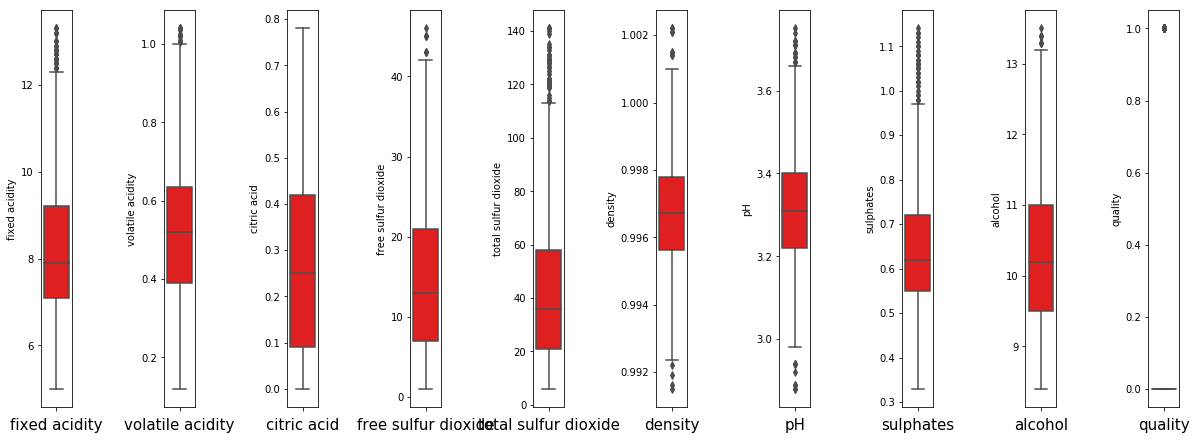

In [13]:
plt.figure(figsize = (20,60))
pltnum =1
for i in ds_out:
    if pltnum <= 120:
        sc =plt.subplot(10,12,pltnum)
        sns.boxplot(ds_out[i],color = 'red',orient = 'v')
        plt.xlabel(i,fontsize =15)
    pltnum+=1
plt.tight_layout()

### there is a considerable reduction in outliers when compared with the earlier box plot

In [14]:
ds_out.describe()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,8.299932,0.524387,0.266222,15.054502,43.295193,0.996742,3.314807,0.643602,10.403239,0.134733
std,1.631626,0.169589,0.191368,9.302499,28.679347,0.001706,0.140921,0.131928,1.008583,0.341553
min,5.000000,0.120000,0.000000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,7.000000,21.000000,0.995620,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,13.000000,36.000000,0.996720,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.635000,0.420000,21.000000,58.000000,0.997800,3.400000,0.720000,11.000000,0.000000
max,13.300000,1.040000,0.780000,46.000000,141.000000,1.002200,3.750000,1.140000,13.500000,1.000000


#### Upon review, I see that all the data types are of numeric and continuous

In [15]:
ds_out.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

## Checking for Skewness

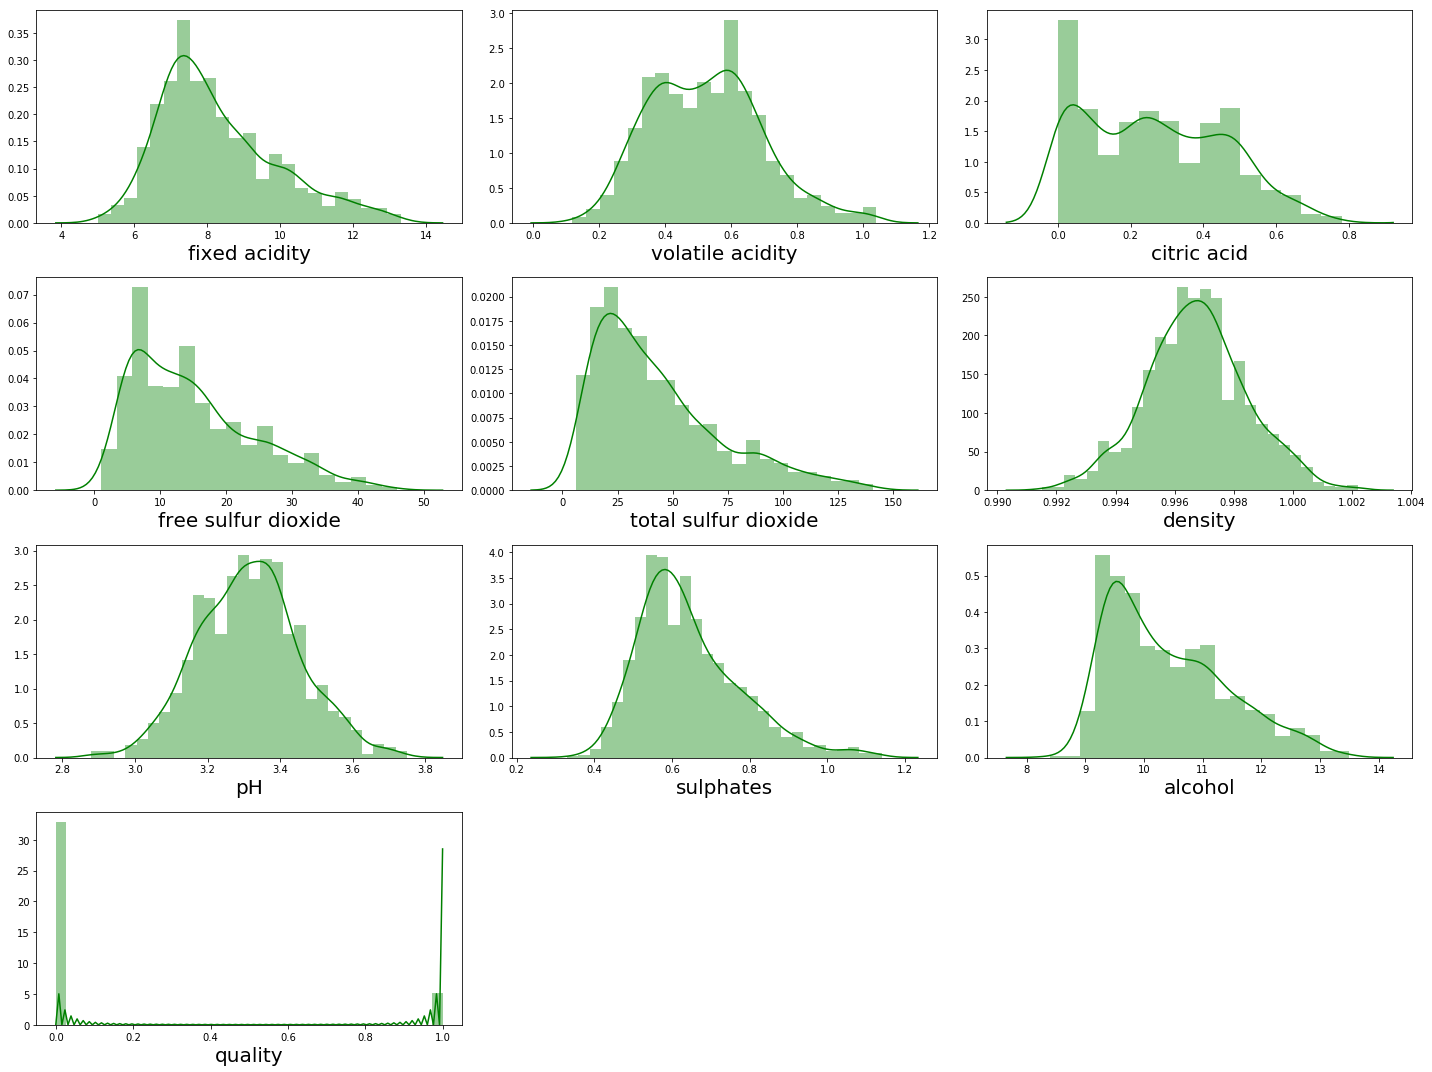

In [16]:
plt.figure(figsize = (20,15))
plotnumber = 1
for i in ds_out:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(ds_out[i],color = 'green')
        plt.xlabel(i,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

### Upon review, I see that most of the features are skewed even after removing the outliers

In [17]:
ds_out.skew()

fixed acidity           0.822151
volatile acidity        0.377459
citric acid             0.294243
free sulfur dioxide     0.856531
total sulfur dioxide    1.109859
density                 0.086522
pH                      0.098752
sulphates               0.939653
alcohol                 0.724442
quality                 2.141760
dtype: float64

### In the skewness check I see that most of the data is skewed except volatile acidity, citric acid, density and pH.

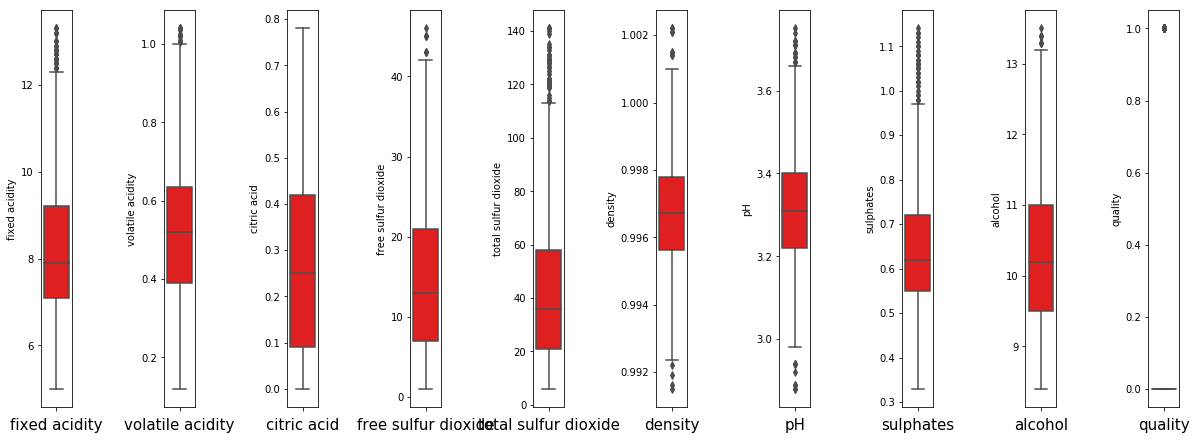

In [18]:
plt.figure(figsize = (20,60))
pltnum =1
for i in ds_out:
    if pltnum <= 120:
        sc =plt.subplot(10,12,pltnum)
        sns.boxplot(ds_out[i],color = 'red',orient = 'v')
        plt.xlabel(i,fontsize =15)
    pltnum+=1
plt.tight_layout()

### Splitting the data

In [19]:
x = ds_out.drop(columns = 'quality')
y = ds_out['quality']

### Applying the power transformation on all the feature columns to control the skewness and outlier

In [20]:
from sklearn.preprocessing import power_transform
new_x= power_transform(x,method ='yeo-johnson')
x = pd.DataFrame(new_x,columns = x.columns)

In [21]:
x.skew()

fixed acidity           0.022444
volatile acidity        0.004910
citric acid             0.018506
free sulfur dioxide    -0.021205
total sulfur dioxide   -0.008802
density                -0.000997
pH                      0.000003
sulphates               0.021780
alcohol                 0.107097
dtype: float64

### The skewness is under control after applying yeo-johnson transformation

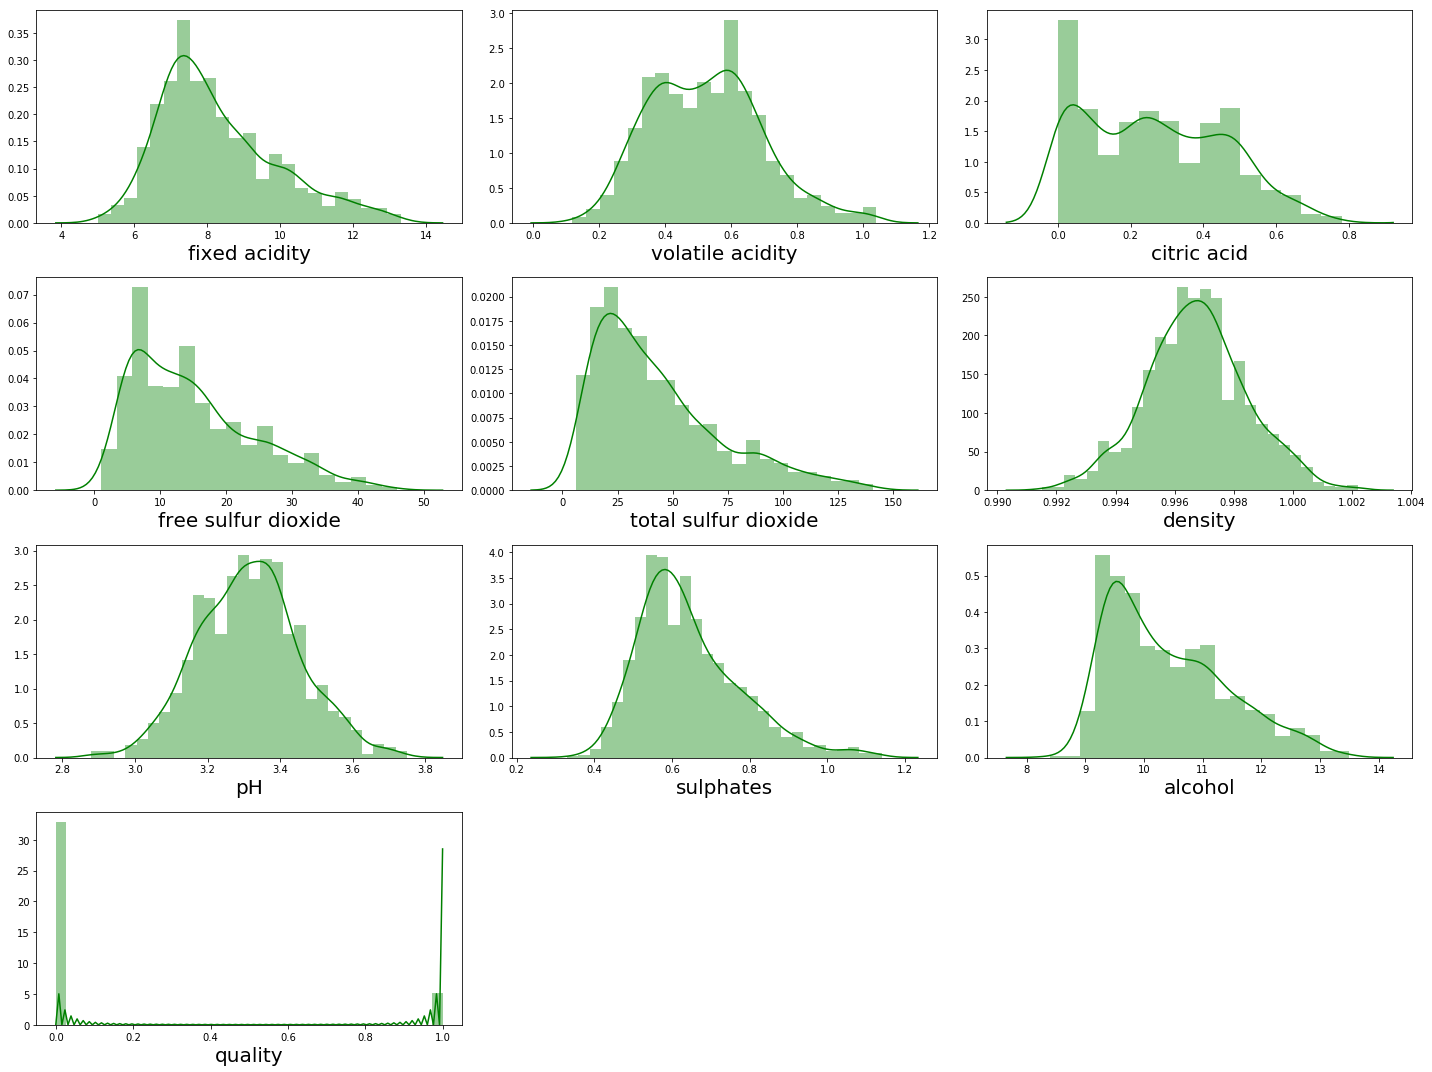

In [22]:
plt.figure(figsize = (20,15))
plotnumber = 1
for i in ds_out:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(ds_out[i],color = 'green')
        plt.xlabel(i,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

### the data looks almost normal (Normally distributed) after removing the outlier and skewness

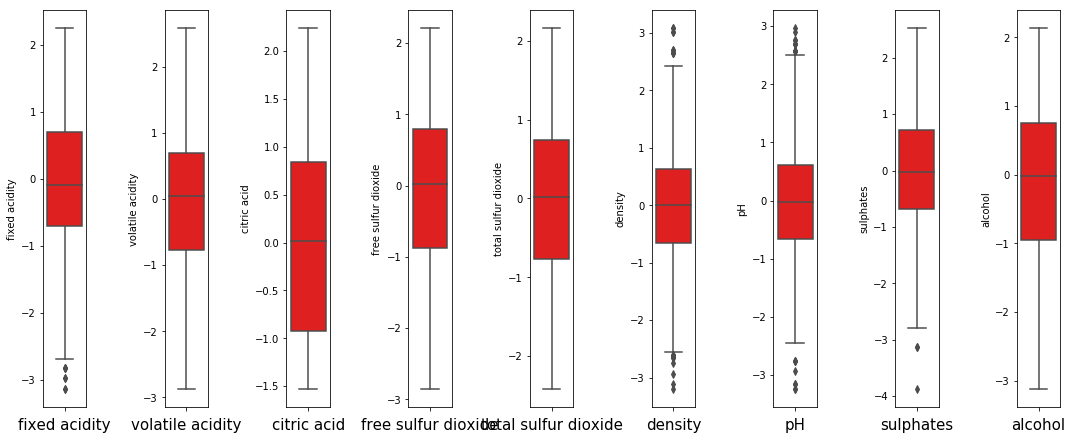

In [23]:
plt.figure(figsize = (20,60))
pltnum =1
for i in x:
    if pltnum <= 120:
        sc =plt.subplot(10,12,pltnum)
        sns.boxplot(x[i],color = 'red',orient = 'v')
        plt.xlabel(i,fontsize =15)
    pltnum+=1
plt.tight_layout()

#### And we have also reduced the outliers further to minimal by applying transformation and only density,PH, sulphates column has a little outlier

## Importing necessary documentation

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression

In [25]:
import warnings
warnings.filterwarnings('ignore')

### We observed earlier that there was a problem of class imbalance, due to which we are addressing the problem with over sampling technique and I'm using SMOTE to do that

In [26]:
from imblearn.over_sampling import SMOTE
sm =SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [27]:
y_over.value_counts()

1    1278
0    1278
Name: quality, dtype: int64

## the class is balanced and I'm proceeding further to find the best random state

In [28]:
for i in range(1,3000):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.3, random_state = i)
    lg = LogisticRegression(solver = 'lbfgs')
    lg.fit(x_train,y_train)
    pred_trn = lg.predict(x_train)
    pred_tst = lg.predict(x_test)
    lg_train = accuracy_score(y_train,pred_trn)
    lg_test = accuracy_score(y_test,pred_tst)
    if round(lg_train*100,1)==round(lg_test*100,1):
        bst_rs = i
print('The best random state is',bst_rs)
        
    

The best random state is 2989


### Splitting the data and 30% data is kept for testing purpose

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.3, random_state = bst_rs)

### Model 1 - Logistic regression

In [32]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_score = accuracy_score(y_test,lr_pred)
lr_score

0.8226857887874837

#### Accuracy score of 0.82

### Model 2 - K-Nearest-Neighbors-Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_score = accuracy_score(y_test,knn_pred)
knn_score

0.8904823989569752

#### Accuracy score of 0.89

### Model 3 - Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_score = accuracy_score(y_test,rf_pred)
rf_score

0.9361147327249022

#### Accuracy score of 0.94

### Model 4 - Extreme Gradient Boosting

In [36]:
import xgboost

In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(x_train,y_train)
xg_pred = xgb.predict(x_test)
xg_score = accuracy_score(y_test,xg_pred)
xg_score

0.9452411994784876

#### Accuracy score of 0.95

## Cross-validating each model to identify the best model

In [42]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lr,x_over,y_over,cv = 7)
cv = cv.mean()
cv

0.8055200881160908

In [43]:
cv1 = cross_val_score(knn,x_over,y_over,cv = 7)
cv1 = cv1.mean()
cv1

0.8743832408328254

In [44]:
cv2 = cross_val_score(rf,x_over,y_over,cv = 7)
cv2 = cv2.mean()
cv2

0.9229123223509031

In [45]:
cv3 = cross_val_score(xgb,x_over,y_over,cv = 7)
cv3 = cv3.mean()
cv3

0.9217445702736519

### After validation, I see that the randomforest is the best model with minimal difference in model accuracy score and cross validation accuracy score

In [47]:
fnl_mod_select = pd.DataFrame({})
sc = [lr_score,knn_score,rf_score,xg_score]
cv = [cv,cv1,cv2,cv3]
fnl_mod_select['score'] = sc
fnl_mod_select['cross_val'] = cv
fnl_mod_select['difference'] = fnl_mod_select['score'] - fnl_mod_select['cross_val']
fnl_mod_select

,score,cross_val,difference
0,0.822686,0.805520,0.017166
1,0.890482,0.874383,0.016099
2,0.936115,0.922912,0.013202
3,0.945241,0.921745,0.023497


### As per the above proof, I'm applying the hyper parameter tuning for Random forest using Grid Search CV

In [48]:
params = {'n_estimators' : [100,200,300,400],
         'criterion' :['gini','entropy'],
         'max_depth':[7,9,11,13],
         'min_samples_split':[3,5,7,9],
         'n_jobs':[1,2,3,4]}

In [49]:
gcv =GridSearchCV(RandomForestClassifier(),params,cv = 5)

In [50]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11, 13],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [100, 200, 300, 400],
                         'n_jobs': [1, 2, 3, 4]})

### The best parameters for the model is

In [53]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_split': 3,
 'n_estimators': 100,
 'n_jobs': 3}

In [54]:
hyp_rf = RandomForestClassifier(criterion = 'entropy', max_depth = 13, min_samples_split = 3, n_estimators = 100,n_jobs =3)

In [57]:
hyp_rf.fit(x_train,y_train)
hyp_pred = hyp_rf.predict(x_test)
hyp_score = accuracy_score(y_test, hyp_pred)
hyp_score

0.9374185136897001

### The AUC score is 0.94 and I see that the model is performing very well

In [59]:
auc = roc_auc_score(y_test,hyp_pred)
auc

0.9390564056405641

### Classification report

In [61]:
report = classification_report(y_test,hyp_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       404
           1       0.90      0.97      0.94       363

    accuracy                           0.94       767
   macro avg       0.94      0.94      0.94       767
weighted avg       0.94      0.94      0.94       767



### We can see from the below plot that the AOC curve

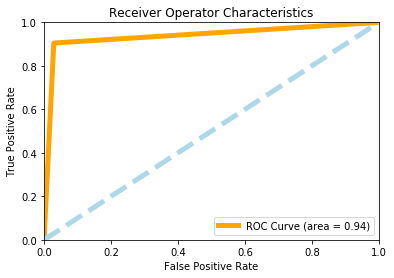

In [63]:
from sklearn.metrics import roc_curve, auc
fpr,tpr, thresholds = roc_curve(hyp_pred, y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr, lw = 5, color = 'orange', label = 'ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'lightblue',lw=5, linestyle = '--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristics')
plt.legend(loc = 'lower right')
plt.show()

In [64]:
import joblib
joblib.dump(hyp_rf, 'Wine-Quality.pkl')

['Wine-Quality.pkl']